In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 


## Explore the Data

In [ ]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [ ]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In observations table we can see:
1. Scientific name
2. Name of the park
3. Number of observations in the past 7 days

In [ ]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In the species table we observe:
1. Category
2. Scientific name
3. Common name
4. Conservation satuts

Here we can al ready see a lot of missing values. Next we will look at the dimension of the data

In [ ]:
species.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [ ]:
observations.count()

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

Looking at the count it appears that there's a lot of values missing in the conservation status.

In [ ]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [ ]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

We will explore the Species data further.
How many different species are there?

In [ ]:
species.groupby('category')['scientific_name'].nunique()


category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
Name: scientific_name, dtype: int64

In [ ]:
#Exploring conservation status
print("The different conservation status are: ", species['conservation_status'].unique())


The different conservation status are:  [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [ ]:
#How many nan values are there?
print("Number of missing values: ", species['conservation_status'].isna().sum())
print(species['conservation_status'].value_counts())


Number of missing values:  5633
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


Now we will explore the observation data

In [ ]:
#How many parks are there?
print("The number of parks in the data: ", observations['park_name'].nunique())
print("The names of the parks in the data: ", observations['park_name'].unique())

The number of parks in the data:  4
The names of the parks in the data:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [ ]:
#Number of species per park
observations.groupby('park_name')['scientific_name'].nunique()

park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64

In [ ]:
#Number of observations
print("The number of observations done in the last 7 days: ", observations['observations'].sum())

The number of observations done in the last 7 days:  3314739


## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [ ]:
species['conservation_status'] = species['conservation_status'].fillna("No Intervention")
print(species['conservation_status'].value_counts())


No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


Text(0.5, 0, 'Conservation Status')

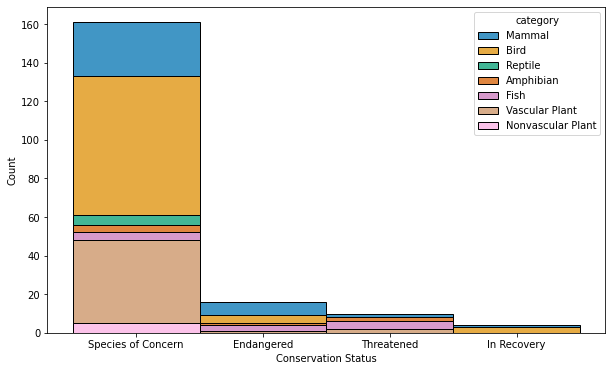

In [ ]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
fig = sns.histplot(data= species[-(species.conservation_status == "No Intervention")], x = 'conservation_status', hue = 'category', multiple = "stack", palette = 'colorblind')
plt.xlabel("Conservation Status")


In [ ]:
subcat =  species[-(species.conservation_status == "No Intervention")].groupby(["conservation_status", "category"])["scientific_name"]
print(subcat.count())
print(subcat.count()/len(subcat))

conservation_status  category         
Endangered           Amphibian             1
                     Bird                  4
                     Fish                  3
                     Mammal                7
                     Vascular Plant        1
In Recovery          Bird                  3
                     Mammal                1
Species of Concern   Amphibian             4
                     Bird                 72
                     Fish                  4
                     Mammal               28
                     Nonvascular Plant     5
                     Reptile               5
                     Vascular Plant       43
Threatened           Amphibian             2
                     Fish                  4
                     Mammal                2
                     Vascular Plant        2
Name: scientific_name, dtype: int64
conservation_status  category         
Endangered           Amphibian            0.055556
                     Bird

In [ ]:
species["is_protected"]=species.conservation_status != 'No Intervention'

subcat2 = species.groupby(["is_protected", "category"]).scientific_name.nunique() .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
subcat2.columns = ['category', 'not_protected', 'protected']

subcat2['percent_protected']= subcat2.protected/(subcat2.protected + subcat2.not_protected) * 100
subcat2

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305
